In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np

from wilson_cowan_beta2 import *

import scipy.sparse as sp
import math

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

# Synchrony

In [5]:
N = 50
wcn = nazemi_jamali_network(N)
θE = -1
θI = 8
wcn.excitatory_firing_rate = lambda x: relu(x - θE)
wcn.inhibitory_firing_rate = lambda x: relu(x - θI)

In [6]:
ts, Es, Is = wcn.simulate(10, Δt = 1e-3)

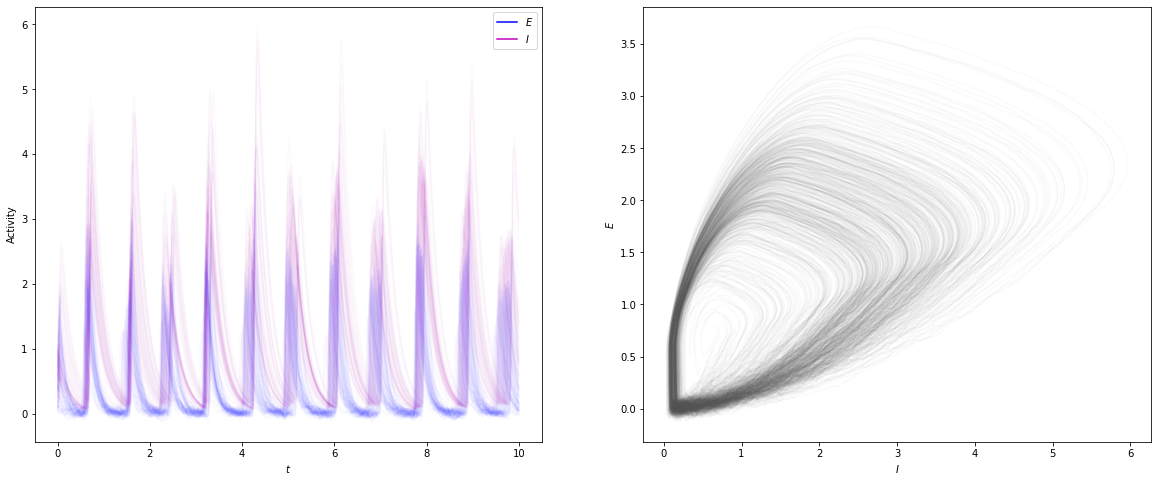

In [7]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/N)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/N)
plt.plot([], [], 'm-', label='$I$')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [9]:
frame_start = len(ts)//2
frame_stop = 3*len(ts)//4
frame_stride = 30


angles = np.linspace(0, 2*np.pi, N, endpoint=False)
xs = np.cos(angles)
ys = np.sin(angles)

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.gca().set_aspect('equal', adjustable='box')
ax.set_facecolor('black')

# plot edges
for edge in [ (a, b) for a, b in product(range(N), range(N)) if wcn.EE_mat[a, b]!=0]:
    plt.plot(np.cos([angles[node] for node in edge]), np.sin([angles[node] for node in edge]), 'w-', zorder=0, alpha=0.5)
# end plot edges
size = 200
shrink_factor = 1.1
scatter_plot_excitatory = ax.scatter(xs, ys, s=size, c=Es[0], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')
scatter_plot_inhibibory = ax.scatter(xs*shrink_factor, ys*shrink_factor, s=size, c=Is[0], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')

def animate(i):
    print(f'step {i}/{len(ts)}', end='\r')
    scatter_plot_excitatory.set_array(Es[i])
    scatter_plot_inhibibory.set_array(Is[i])
    return scatter_plot_excitatory,


# Init only required for blitting to give a clean slate.
def init():
    scatter_plot_excitatory.set_array(Es[0])
    scatter_plot_inhibibory.set_array(Is[0])
    return scatter_plot_excitatory,

anim = animation.FuncAnimation(fig, animate, np.arange(frame_start,frame_stop,frame_stride), init_func=init,
                              interval=1/24*1000, blit=True)

# anim.save('PE_pulse.mp4', writer='imagemagick', fps=24)

plt.close()
HTML(anim.to_html5_video())